In [1]:
import numpy as np
from numpy import arange
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import pickle

In [2]:
from sklearn.linear_model import ElasticNet

In [3]:
model_name = "elastic_net"
display_name = "Elastic Net"

In [4]:
y_test = pd.read_csv('y_test.csv')
file = open("Selection Methods","rb")
sel_methods = np.load(file)

In [5]:
# train and test model
def get_best_model(method, args, _cv, is_sample):
    sample_string = ''
    if (is_sample):
        sample_string = '_sample'
    y_train = pd.read_csv('y_train'+ sample_string + '.csv')    
    method_string = method
    if (method == ''):
        method_string = "no feature selection"
    print('\n\nRunning cross fold validation for',display_name,'with',method_string,'dataset')
    x_train = pd.read_csv('x_train' + method + sample_string + '.csv').values
    x_test = pd.read_csv('x_test' + method + '.csv').values
    pipe = Pipeline([('clf', ElasticNet())])
    grid = GridSearchCV(pipe, args, cv = _cv, verbose = 1, scoring = 'r2', n_jobs=6)
    grid.fit(x_train, y_train.values.ravel())
    print('\nBest score for',display_name,'with',method_string,"dataset:",grid.best_score_)
    best_args = grid.best_estimator_.get_params()
    print('\nBest hyperparameters for',display_name,'with',method_string,'dataset:')
    for arg in best_args:
        print(arg,":",best_args[arg])
    y_test_predict = grid.predict(x_test)
    mse = mean_squared_error(y_test,y_test_predict)
    mae = mean_absolute_error(y_test,y_test_predict)
    r2 = r2_score(y_test,y_test_predict)
    print('\nPrediction scores for',display_name,'using',method_string,':')
    print('Mean Squared error:',mse)
    print('Mean Absolute error:',mae)
    print('R^2:',r2)
    return grid.best_estimator_,grid.best_score_,mse,mae,r2

In [6]:
# save model
def save_model(model,method):
    with open('CrimeGUI/Models/'+model_name+method,'wb') as file:
        pickle.dump(model,file)

<h3>F-Regression feature selected dataset<h3>

In [12]:
is_sample = False
num_folds = 10
args = {'clf__alpha':(0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,2),
        'clf__copy_X':(True,False),
        'clf__fit_intercept':(True,False),
        'clf__normalize':(True,False),
        'clf__positive':(True,False),
        'clf__selection':('cyclic','random'),
        'clf__l1_ratio':(0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9),
        'clf__random_state':([7]),
        'clf__tol':(0.001, 0.005,0.01,0.02,0.04,0.06,0.08,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1)}

In [13]:
f_reg_model, f_reg_train_score, f_reg_mse, f_reg_mae, f_reg_r2 = get_best_model(sel_methods[0], args, num_folds, is_sample)



Running cross fold validation for Elastic Net with _f_regression dataset
Fitting 10 folds for each of 97920 candidates, totalling 979200 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  40 tasks      | elapsed:    1.4s
[Parallel(n_jobs=6)]: Done 1132 tasks      | elapsed:    7.0s
[Parallel(n_jobs=6)]: Done 3132 tasks      | elapsed:   16.5s
[Parallel(n_jobs=6)]: Done 5932 tasks      | elapsed:   29.4s
[Parallel(n_jobs=6)]: Done 9532 tasks      | elapsed:   46.2s
[Parallel(n_jobs=6)]: Done 13932 tasks      | elapsed:  1.1min
[Parallel(n_jobs=6)]: Done 19132 tasks      | elapsed:  1.5min
[Parallel(n_jobs=6)]: Done 25132 tasks      | elapsed:  2.0min
[Parallel(n_jobs=6)]: Done 31932 tasks      | elapsed:  2.6min
[Parallel(n_jobs=6)]: Done 39532 tasks      | elapsed:  3.1min
[Parallel(n_jobs=6)]: Done 47932 tasks      | elapsed:  3.7min
[Parallel(n_jobs=6)]: Done 57132 tasks      | elapsed:  4.4min
[Parallel(n_jobs=6)]: Done 67132 tasks      | elapsed:  5.3min
[Parallel(n_jobs=6)]: Done 77932 tasks      | elapsed:  6.2min
[Parallel(n_jobs=6)]: Done 89532 tasks      | ela


Best score for Elastic Net with _f_regression dataset: 0.5614682772686381

Best hyperparameters for Elastic Net with _f_regression dataset:
memory : None
steps : [('clf', ElasticNet(alpha=0.1, fit_intercept=False, l1_ratio=0.9, normalize=True,
           positive=True, random_state=7, selection='random', tol=0.9))]
verbose : False
clf : ElasticNet(alpha=0.1, fit_intercept=False, l1_ratio=0.9, normalize=True,
           positive=True, random_state=7, selection='random', tol=0.9)
clf__alpha : 0.1
clf__copy_X : True
clf__fit_intercept : False
clf__l1_ratio : 0.9
clf__max_iter : 1000
clf__normalize : True
clf__positive : True
clf__precompute : False
clf__random_state : 7
clf__selection : random
clf__tol : 0.9
clf__warm_start : False

Prediction scores for Elastic Net using _f_regression :
Mean Squared error: 8.488073356509641
Mean Absolute error: 1.540361034917549
R^2: 0.5645410092297589


In [25]:
#poor accuracy, extended parameters
is_sample = False
num_folds = 10
args = {'clf__alpha':(0.00001, 0.0001, 0.001, 0.001, 0.01, 0.0, 1.0, 10.0, 100.0),
        'clf__copy_X':(True,False),
        'clf__fit_intercept':(True,False),
        'clf__normalize':(True,False),
        'clf__positive':(True,False),
        'clf__selection':('cyclic','random'),
        'clf__l1_ratio':(arange(0, 5, 0.2)),
        'clf__random_state':([7]),
        'clf__tol':(0.1, 0.3, 0.5, 0.7, 1)}

In [26]:
f_reg_model, f_reg_train_score, f_reg_mse, f_reg_mae, f_reg_r2 = get_best_model(sel_methods[0], args, num_folds, is_sample)



Running cross fold validation for Elastic Net with _f_regression dataset
Fitting 10 folds for each of 36000 candidates, totalling 360000 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  40 tasks      | elapsed:    2.1s
[Parallel(n_jobs=6)]: Done 389 tasks      | elapsed:   15.4s
[Parallel(n_jobs=6)]: Done 1356 tasks      | elapsed:   22.2s
[Parallel(n_jobs=6)]: Done 2756 tasks      | elapsed:   31.0s
[Parallel(n_jobs=6)]: Done 4454 tasks      | elapsed:   47.7s
[Parallel(n_jobs=6)]: Done 6282 tasks      | elapsed:  1.9min
[Parallel(n_jobs=6)]: Done 8051 tasks      | elapsed:  4.2min
[Parallel(n_jobs=6)]: Done 9715 tasks      | elapsed:  7.3min
[Parallel(n_jobs=6)]: Done 15618 tasks      | elapsed:  8.1min
[Parallel(n_jobs=6)]: Done 21434 tasks      | elapsed:  8.8min
[Parallel(n_jobs=6)]: Done 25276 tasks      | elapsed:  9.6min
[Parallel(n_jobs=6)]: Done 28278 tasks      | elapsed: 13.2min
[Parallel(n_jobs=6)]: Done 33970 tasks      | elapsed: 16.3min
[Parallel(n_jobs=6)]: Done 42344 tasks      | elapsed: 17.2min
[Parallel(n_jobs=6)]: Done 45252 tasks      | elapsed


Best score for Elastic Net with _f_regression dataset: 0.7440300478556641

Best hyperparameters for Elastic Net with _f_regression dataset:
memory : None
steps : [('clf', ElasticNet(alpha=0.0001, l1_ratio=0.0, random_state=7, tol=0.1))]
verbose : False
clf : ElasticNet(alpha=0.0001, l1_ratio=0.0, random_state=7, tol=0.1)
clf__alpha : 0.0001
clf__copy_X : True
clf__fit_intercept : True
clf__l1_ratio : 0.0
clf__max_iter : 1000
clf__normalize : False
clf__positive : False
clf__precompute : False
clf__random_state : 7
clf__selection : cyclic
clf__tol : 0.1
clf__warm_start : False

Prediction scores for Elastic Net using _f_regression :
Mean Squared error: 4.841407678763893
Mean Absolute error: 1.3794726052389663
R^2: 0.7516239064916915


c:\users\chris\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 110758.68175381658, tolerance: 85840.63711908861
  model = cd_fast.enet_coordinate_descent(


In [8]:
#fine tuning of parameters parameters
is_sample = False
num_folds = 10
args = {'clf__alpha':(0.00005, 0.0001, 0.00015, 0.0002, 0.00025),
        'clf__copy_X':(True,False),
        'clf__fit_intercept':(True,False),
        'clf__normalize':(True,False),
        'clf__positive':(True,False),
        'clf__selection':('cyclic','random'),
        'clf__l1_ratio':(arange(0, 0.2, 0.05)),
        'clf__random_state':([7]),
        'clf__tol':(0.05,0.06,0.07,0.08,0.09,0.1,0.11,0.12,0.13,0.14,0.14)}

In [9]:
f_reg_model, f_reg_train_score, f_reg_mse, f_reg_mae, f_reg_r2 = get_best_model(sel_methods[0], args, num_folds, is_sample)



Running cross fold validation for Elastic Net with _f_regression dataset
Fitting 10 folds for each of 7040 candidates, totalling 70400 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  43 tasks      | elapsed:    1.8s
[Parallel(n_jobs=6)]: Done 296 tasks      | elapsed:   30.7s
[Parallel(n_jobs=6)]: Done 630 tasks      | elapsed:  1.2min
[Parallel(n_jobs=6)]: Done 1526 tasks      | elapsed:  1.9min
[Parallel(n_jobs=6)]: Done 3326 tasks      | elapsed:  2.2min
[Parallel(n_jobs=6)]: Done 4542 tasks      | elapsed:  3.3min
[Parallel(n_jobs=6)]: Done 7142 tasks      | elapsed:  3.8min
[Parallel(n_jobs=6)]: Done 8912 tasks      | elapsed:  5.7min
[Parallel(n_jobs=6)]: Done 11748 tasks      | elapsed:  7.0min
[Parallel(n_jobs=6)]: Done 14618 tasks      | elapsed:  8.5min
[Parallel(n_jobs=6)]: Done 18031 tasks      | elapsed: 10.1min
[Parallel(n_jobs=6)]: Done 21576 tasks      | elapsed: 12.1min
[Parallel(n_jobs=6)]: Done 25460 tasks      | elapsed: 14.1min
[Parallel(n_jobs=6)]: Done 29242 tasks      | elapsed: 16.8min
[Parallel(n_jobs=6)]: Done 35520 tasks      | elapsed:


Best score for Elastic Net with _f_regression dataset: 0.7440699158288866

Best hyperparameters for Elastic Net with _f_regression dataset:
memory : None
steps : [('clf', ElasticNet(alpha=0.00025, l1_ratio=0.0, random_state=7, tol=0.13))]
verbose : False
clf : ElasticNet(alpha=0.00025, l1_ratio=0.0, random_state=7, tol=0.13)
clf__alpha : 0.00025
clf__copy_X : True
clf__fit_intercept : True
clf__l1_ratio : 0.0
clf__max_iter : 1000
clf__normalize : False
clf__positive : False
clf__precompute : False
clf__random_state : 7
clf__selection : cyclic
clf__tol : 0.13
clf__warm_start : False

Prediction scores for Elastic Net using _f_regression :
Mean Squared error: 4.841623587093962
Mean Absolute error: 1.3804843913274787
R^2: 0.7516128298645747


c:\users\chris\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 112417.50344139934, tolerance: 111592.8282548152
  model = cd_fast.enet_coordinate_descent(


In [8]:
# minor decrease in test accuracy, model saved to prevent overfitting
is_sample = False
num_folds = 10
args = {'clf__alpha':([0.00025]),
        'clf__copy_X':([True]),
        'clf__fit_intercept':([True]),
        'clf__normalize':([False]),
        'clf__positive':([False]),
        'clf__selection':(['cyclic']),
        'clf__l1_ratio':([0.0]),
        'clf__random_state':([7]),
        'clf__tol':([0.13])}

In [9]:
f_reg_model, f_reg_train_score, f_reg_mse, f_reg_mae, f_reg_r2 = get_best_model(sel_methods[0], args, num_folds, is_sample)



Running cross fold validation for Elastic Net with _f_regression dataset
Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  10 out of  10 | elapsed:    4.0s remaining:    0.0s
[Parallel(n_jobs=6)]: Done  10 out of  10 | elapsed:    4.0s finished



Best score for Elastic Net with _f_regression dataset: 0.7440699158288866

Best hyperparameters for Elastic Net with _f_regression dataset:
memory : None
steps : [('clf', ElasticNet(alpha=0.00025, l1_ratio=0.0, random_state=7, tol=0.13))]
verbose : False
clf : ElasticNet(alpha=0.00025, l1_ratio=0.0, random_state=7, tol=0.13)
clf__alpha : 0.00025
clf__copy_X : True
clf__fit_intercept : True
clf__l1_ratio : 0.0
clf__max_iter : 1000
clf__normalize : False
clf__positive : False
clf__precompute : False
clf__random_state : 7
clf__selection : cyclic
clf__tol : 0.13
clf__warm_start : False

Prediction scores for Elastic Net using _f_regression :
Mean Squared error: 4.841623587093962
Mean Absolute error: 1.3804843913274787
R^2: 0.7516128298645747


c:\users\chris\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 112417.50344139934, tolerance: 111592.8282548152
  model = cd_fast.enet_coordinate_descent(


In [10]:
save_model(f_reg_model,sel_methods[0])

<h3>Chi-Squared feature selected dataset<h3>

In [14]:
is_sample = False
num_folds = 10
args = {'clf__alpha':(0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,2),
        'clf__copy_X':(True,False),
        'clf__fit_intercept':(True,False),
        'clf__normalize':(True,False),
        'clf__positive':(True,False),
        'clf__selection':('cyclic','random'),
        'clf__l1_ratio':(0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9),
        'clf__random_state':([7]),
        'clf__tol':(0.001, 0.005,0.01,0.02,0.04,0.06,0.08,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1)}

In [15]:
chi2_model, chi2_train_score, chi2_mse, chi2_mae, chi2_r2 = get_best_model(sel_methods[1], args, num_folds, is_sample)



Running cross fold validation for Elastic Net with _chi2 dataset
Fitting 10 folds for each of 97920 candidates, totalling 979200 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done 100 tasks      | elapsed:    0.7s
[Parallel(n_jobs=6)]: Done 1300 tasks      | elapsed:    6.9s
[Parallel(n_jobs=6)]: Done 3300 tasks      | elapsed:   16.5s
[Parallel(n_jobs=6)]: Done 6100 tasks      | elapsed:   29.8s
[Parallel(n_jobs=6)]: Done 9700 tasks      | elapsed:   47.1s
[Parallel(n_jobs=6)]: Done 14100 tasks      | elapsed:  1.1min
[Parallel(n_jobs=6)]: Done 19300 tasks      | elapsed:  1.6min
[Parallel(n_jobs=6)]: Done 25300 tasks      | elapsed:  2.0min
[Parallel(n_jobs=6)]: Done 32100 tasks      | elapsed:  2.6min
[Parallel(n_jobs=6)]: Done 39700 tasks      | elapsed:  3.2min
[Parallel(n_jobs=6)]: Done 48100 tasks      | elapsed:  3.7min
[Parallel(n_jobs=6)]: Done 57300 tasks      | elapsed:  4.4min
[Parallel(n_jobs=6)]: Done 67300 tasks      | elapsed:  5.2min
[Parallel(n_jobs=6)]: Done 78100 tasks      | elapsed:  6.0min
[Parallel(n_jobs=6)]: Done 89700 tasks      | ela


Best score for Elastic Net with _chi2 dataset: 0.5162854607402666

Best hyperparameters for Elastic Net with _chi2 dataset:
memory : None
steps : [('clf', ElasticNet(alpha=0.1, fit_intercept=False, l1_ratio=0.9, normalize=True,
           positive=True, random_state=7, tol=0.6))]
verbose : False
clf : ElasticNet(alpha=0.1, fit_intercept=False, l1_ratio=0.9, normalize=True,
           positive=True, random_state=7, tol=0.6)
clf__alpha : 0.1
clf__copy_X : True
clf__fit_intercept : False
clf__l1_ratio : 0.9
clf__max_iter : 1000
clf__normalize : True
clf__positive : True
clf__precompute : False
clf__random_state : 7
clf__selection : cyclic
clf__tol : 0.6
clf__warm_start : False

Prediction scores for Elastic Net using _chi2 :
Mean Squared error: 9.34086411453992
Mean Absolute error: 1.6182698690898771
R^2: 0.5207907508103667


In [27]:
#poor accuracy, extended parameters
is_sample = False
num_folds = 10
args = {'clf__alpha':(0.00001, 0.0001, 0.001, 0.001, 0.01, 0.0, 1.0, 10.0, 100.0),
        'clf__copy_X':(True,False),
        'clf__fit_intercept':(True,False),
        'clf__normalize':(True,False),
        'clf__positive':(True,False),
        'clf__selection':('cyclic','random'),
        'clf__l1_ratio':(arange(0, 5, 0.2)),
        'clf__random_state':([7]),
        'clf__tol':(0.1, 0.3, 0.5, 0.7, 1)}

In [28]:
chi2_model, chi2_train_score, chi2_mse, chi2_mae, chi2_r2 = get_best_model(sel_methods[1], args, num_folds, is_sample)

[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.




Running cross fold validation for Elastic Net with _chi2 dataset
Fitting 10 folds for each of 36000 candidates, totalling 360000 fits


[Parallel(n_jobs=6)]: Done 100 tasks      | elapsed:    0.7s
[Parallel(n_jobs=6)]: Done 706 tasks      | elapsed:   12.9s
[Parallel(n_jobs=6)]: Done 1710 tasks      | elapsed:   18.7s
[Parallel(n_jobs=6)]: Done 3110 tasks      | elapsed:   26.0s
[Parallel(n_jobs=6)]: Done 4984 tasks      | elapsed:   50.5s
[Parallel(n_jobs=6)]: Done 6606 tasks      | elapsed:  1.9min
[Parallel(n_jobs=6)]: Done 8084 tasks      | elapsed:  3.9min
[Parallel(n_jobs=6)]: Done 9443 tasks      | elapsed:  6.3min
[Parallel(n_jobs=6)]: Done 12174 tasks      | elapsed:  7.3min
[Parallel(n_jobs=6)]: Done 15974 tasks      | elapsed:  7.7min
[Parallel(n_jobs=6)]: Done 20174 tasks      | elapsed:  8.1min
[Parallel(n_jobs=6)]: Done 24528 tasks      | elapsed:  8.7min
[Parallel(n_jobs=6)]: Done 28184 tasks      | elapsed: 12.2min
[Parallel(n_jobs=6)]: Done 32872 tasks      | elapsed: 15.4min
[Parallel(n_jobs=6)]: Done 42748 tasks      | elapsed: 16.6min
[Parallel(n_jobs=6)]: Done 46886 tasks      | elapsed: 20.6min
[P


Best score for Elastic Net with _chi2 dataset: 0.7277697244837357

Best hyperparameters for Elastic Net with _chi2 dataset:
memory : None
steps : [('clf', ElasticNet(alpha=0.0, l1_ratio=0.0, positive=True, random_state=7,
           selection='random', tol=0.1))]
verbose : False
clf : ElasticNet(alpha=0.0, l1_ratio=0.0, positive=True, random_state=7,
           selection='random', tol=0.1)
clf__alpha : 0.0
clf__copy_X : True
clf__fit_intercept : True
clf__l1_ratio : 0.0
clf__max_iter : 1000
clf__normalize : False
clf__positive : True
clf__precompute : False
clf__random_state : 7
clf__selection : random
clf__tol : 0.1
clf__warm_start : False

Prediction scores for Elastic Net using _chi2 :
Mean Squared error: 5.254872539600692
Mean Absolute error: 1.4527229130594046
R^2: 0.7304121445927596


In [11]:
#fine tuning of parameters parameters
is_sample = False
num_folds = 10
args = {'clf__alpha':(0,0.000001,0.000002,0.000003,0.000004,0.000005),
        'clf__copy_X':(True,False),
        'clf__fit_intercept':(True,False),
        'clf__normalize':(True,False),
        'clf__positive':(True,False),
        'clf__selection':('cyclic','random'),
        'clf__l1_ratio':(0,0.000001,0.000002,0.000003,0.000004,0.000005),
        'clf__random_state':([7]),
        'clf__tol':(0.07,0.08,0.09,0.1,0.11,0.12)}

In [12]:
chi2_model, chi2_train_score, chi2_mse, chi2_mae, chi2_r2 = get_best_model(sel_methods[1], args, num_folds, is_sample)

[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.




Running cross fold validation for Elastic Net with _chi2 dataset
Fitting 10 folds for each of 6912 candidates, totalling 69120 fits


[Parallel(n_jobs=6)]: Done  92 tasks      | elapsed:    0.7s
[Parallel(n_jobs=6)]: Done 380 tasks      | elapsed:   39.3s
[Parallel(n_jobs=6)]: Done 768 tasks      | elapsed:  1.6min
[Parallel(n_jobs=6)]: Done 1418 tasks      | elapsed:  3.0min
[Parallel(n_jobs=6)]: Done 2174 tasks      | elapsed:  4.8min
[Parallel(n_jobs=6)]: Done 3114 tasks      | elapsed:  6.8min
[Parallel(n_jobs=6)]: Done 4388 tasks      | elapsed:  8.7min
[Parallel(n_jobs=6)]: Done 5906 tasks      | elapsed: 11.1min
[Parallel(n_jobs=6)]: Done 7398 tasks      | elapsed: 14.8min
[Parallel(n_jobs=6)]: Done 9080 tasks      | elapsed: 18.4min
[Parallel(n_jobs=6)]: Done 11180 tasks      | elapsed: 21.7min
[Parallel(n_jobs=6)]: Done 14466 tasks      | elapsed: 24.0min
[Parallel(n_jobs=6)]: Done 17846 tasks      | elapsed: 26.3min
[Parallel(n_jobs=6)]: Done 22766 tasks      | elapsed: 28.3min
[Parallel(n_jobs=6)]: Done 27402 tasks      | elapsed: 31.1min
[Parallel(n_jobs=6)]: Done 32516 tasks      | elapsed: 34.3min
[Para


Best score for Elastic Net with _chi2 dataset: 0.7277697244837357

Best hyperparameters for Elastic Net with _chi2 dataset:
memory : None
steps : [('clf', ElasticNet(alpha=0, l1_ratio=0, positive=True, random_state=7,
           selection='random', tol=0.07))]
verbose : False
clf : ElasticNet(alpha=0, l1_ratio=0, positive=True, random_state=7,
           selection='random', tol=0.07)
clf__alpha : 0
clf__copy_X : True
clf__fit_intercept : True
clf__l1_ratio : 0
clf__max_iter : 1000
clf__normalize : False
clf__positive : True
clf__precompute : False
clf__random_state : 7
clf__selection : random
clf__tol : 0.07
clf__warm_start : False

Prediction scores for Elastic Net using _chi2 :
Mean Squared error: 5.254872539600692
Mean Absolute error: 1.4527229130594046
R^2: 0.7304121445927596


In [11]:
# hyperparameters shifted slightly but accuracies unchanged, model saved
is_sample = False
num_folds = 10
args = {'clf__alpha':([0]),
        'clf__copy_X':([True]),
        'clf__fit_intercept':([True]),
        'clf__normalize':([False]),
        'clf__positive':([True]),
        'clf__selection':(['random']),
        'clf__l1_ratio':([0]),
        'clf__random_state':([7]),
        'clf__tol':([0.07])}

In [12]:
chi2_model, chi2_train_score, chi2_mse, chi2_mae, chi2_r2 = get_best_model(sel_methods[1], args, num_folds, is_sample)



Running cross fold validation for Elastic Net with _chi2 dataset
Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  10 out of  10 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=6)]: Done  10 out of  10 | elapsed:    0.1s finished
c:\users\chris\appdata\local\programs\python\python39\lib\site-packages\sklearn\pipeline.py:335: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
c:\users\chris\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(



Best score for Elastic Net with _chi2 dataset: 0.7277697244837357

Best hyperparameters for Elastic Net with _chi2 dataset:
memory : None
steps : [('clf', ElasticNet(alpha=0, l1_ratio=0, positive=True, random_state=7,
           selection='random', tol=0.07))]
verbose : False
clf : ElasticNet(alpha=0, l1_ratio=0, positive=True, random_state=7,
           selection='random', tol=0.07)
clf__alpha : 0
clf__copy_X : True
clf__fit_intercept : True
clf__l1_ratio : 0
clf__max_iter : 1000
clf__normalize : False
clf__positive : True
clf__precompute : False
clf__random_state : 7
clf__selection : random
clf__tol : 0.07
clf__warm_start : False

Prediction scores for Elastic Net using _chi2 :
Mean Squared error: 5.254872539600692
Mean Absolute error: 1.4527229130594046
R^2: 0.7304121445927596


In [13]:
save_model(chi2_model,sel_methods[1])

<h3>AdaBoost feature selected dataset<h3>

In [29]:
is_sample = False
num_folds = 10
args = {'clf__alpha':(0.00001, 0.0001, 0.001, 0.001, 0.01, 0.0, 1.0, 10.0, 100.0),
        'clf__copy_X':(True,False),
        'clf__fit_intercept':(True,False),
        'clf__normalize':(True,False),
        'clf__positive':(True,False),
        'clf__selection':('cyclic','random'),
        'clf__l1_ratio':(arange(0, 5, 0.2)),
        'clf__random_state':([7]),
        'clf__tol':(0.1, 0.3, 0.5, 0.7, 1)}

In [30]:
ada_model, ada_train_score, ada_mse, ada_mae, ada_r2 = get_best_model(sel_methods[2], args, num_folds, is_sample)



Running cross fold validation for Elastic Net with _adaboost dataset
Fitting 10 folds for each of 36000 candidates, totalling 360000 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done 108 tasks      | elapsed:    1.4s
[Parallel(n_jobs=6)]: Done 706 tasks      | elapsed:   14.1s
[Parallel(n_jobs=6)]: Done 1710 tasks      | elapsed:   20.2s
[Parallel(n_jobs=6)]: Done 3110 tasks      | elapsed:   28.5s
[Parallel(n_jobs=6)]: Done 4984 tasks      | elapsed:   53.4s
[Parallel(n_jobs=6)]: Done 6576 tasks      | elapsed:  2.0min
[Parallel(n_jobs=6)]: Done 8108 tasks      | elapsed:  4.2min
[Parallel(n_jobs=6)]: Done 9568 tasks      | elapsed:  6.6min
[Parallel(n_jobs=6)]: Done 15216 tasks      | elapsed:  7.7min
[Parallel(n_jobs=6)]: Done 21494 tasks      | elapsed:  8.4min
[Parallel(n_jobs=6)]: Done 25642 tasks      | elapsed:  9.2min
[Parallel(n_jobs=6)]: Done 28449 tasks      | elapsed: 12.7min
[Parallel(n_jobs=6)]: Done 33520 tasks      | elapsed: 15.6min
[Parallel(n_jobs=6)]: Done 42200 tasks      | elapsed: 16.4min
[Parallel(n_jobs=6)]: Done 45314 tasks      | elapsed


Best score for Elastic Net with _adaboost dataset: 0.741238992188728

Best hyperparameters for Elastic Net with _adaboost dataset:
memory : None
steps : [('clf', ElasticNet(alpha=0.0001, l1_ratio=1.6, random_state=7, tol=0.1))]
verbose : False
clf : ElasticNet(alpha=0.0001, l1_ratio=1.6, random_state=7, tol=0.1)
clf__alpha : 0.0001
clf__copy_X : True
clf__fit_intercept : True
clf__l1_ratio : 1.6
clf__max_iter : 1000
clf__normalize : False
clf__positive : False
clf__precompute : False
clf__random_state : 7
clf__selection : cyclic
clf__tol : 0.1
clf__warm_start : False

Prediction scores for Elastic Net using _adaboost :
Mean Squared error: 4.970311483209978
Mean Absolute error: 1.3915036639775946
R^2: 0.7450108250263331


In [15]:
# further hyperparameter exploration
is_sample = False
num_folds = 10
args = {'clf__alpha':(0.00001, 0.0001, 0.001, 0.001, 0.01),
        'clf__copy_X':(True,False),
        'clf__fit_intercept':(True,False),
        'clf__normalize':(True,False),
        'clf__positive':(True,False),
        'clf__selection':('cyclic','random'),
        'clf__l1_ratio':(arange(0, 3, 0.2)),
        'clf__random_state':([7]),
        'clf__tol':(0.05,0.06,0.07,0.08,0.09,0.1,0.11,1.12,1.13,1.14,1.15)}

In [16]:
ada_model, ada_train_score, ada_mse, ada_mae, ada_r2 = get_best_model(sel_methods[2], args, num_folds, is_sample)



Running cross fold validation for Elastic Net with _adaboost dataset
Fitting 10 folds for each of 26400 candidates, totalling 264000 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  92 tasks      | elapsed:    2.5s
[Parallel(n_jobs=6)]: Done 356 tasks      | elapsed:   35.4s
[Parallel(n_jobs=6)]: Done 864 tasks      | elapsed:  1.4min
[Parallel(n_jobs=6)]: Done 2222 tasks      | elapsed:  1.6min
[Parallel(n_jobs=6)]: Done 4022 tasks      | elapsed:  1.8min
[Parallel(n_jobs=6)]: Done 6222 tasks      | elapsed:  2.2min
[Parallel(n_jobs=6)]: Done 8752 tasks      | elapsed:  2.7min
[Parallel(n_jobs=6)]: Done 10928 tasks      | elapsed:  4.0min
[Parallel(n_jobs=6)]: Done 13254 tasks      | elapsed:  5.2min
[Parallel(n_jobs=6)]: Done 16508 tasks      | elapsed:  6.6min
[Parallel(n_jobs=6)]: Done 20708 tasks      | elapsed:  7.2min
[Parallel(n_jobs=6)]: Done 25308 tasks      | elapsed:  7.9min
[Parallel(n_jobs=6)]: Done 29414 tasks      | elapsed:  9.8min
[Parallel(n_jobs=6)]: Done 34694 tasks      | elapsed: 10.7min
[Parallel(n_jobs=6)]: Done 39015 tasks      | elapsed


Best score for Elastic Net with _adaboost dataset: 0.7413227312940383

Best hyperparameters for Elastic Net with _adaboost dataset:
memory : None
steps : [('clf', ElasticNet(alpha=0.0001, l1_ratio=1.6, random_state=7, selection='random',
           tol=0.05))]
verbose : False
clf : ElasticNet(alpha=0.0001, l1_ratio=1.6, random_state=7, selection='random',
           tol=0.05)
clf__alpha : 0.0001
clf__copy_X : True
clf__fit_intercept : True
clf__l1_ratio : 1.6
clf__max_iter : 1000
clf__normalize : False
clf__positive : False
clf__precompute : False
clf__random_state : 7
clf__selection : random
clf__tol : 0.05
clf__warm_start : False

Prediction scores for Elastic Net using _adaboost :
Mean Squared error: 4.9653582802656375
Mean Absolute error: 1.3900598348458246
R^2: 0.7452649364912828


In [14]:
# further hyperparameter exploration
is_sample = False
num_folds = 10
args = {'clf__alpha':(arange(0.00006, 0.00014, 0.00001)),
        'clf__copy_X':(True,False),
        'clf__fit_intercept':(True,False),
        'clf__normalize':(True,False),
        'clf__positive':(True,False),
        'clf__selection':('cyclic','random'),
        'clf__l1_ratio':(arange(1, 2, 0.05)),
        'clf__random_state':([7]),
        'clf__tol':(arange(0.01, 0.05, 0.01))}

In [15]:
ada_model, ada_train_score, ada_mse, ada_mae, ada_r2 = get_best_model(sel_methods[2], args, num_folds, is_sample)



Running cross fold validation for Elastic Net with _adaboost dataset
Fitting 10 folds for each of 20480 candidates, totalling 204800 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  64 tasks      | elapsed:    0.6s
[Parallel(n_jobs=6)]: Done 644 tasks      | elapsed:    7.5s
[Parallel(n_jobs=6)]: Done 1194 tasks      | elapsed:   32.3s
[Parallel(n_jobs=6)]: Done 2024 tasks      | elapsed:  1.2min
[Parallel(n_jobs=6)]: Done 2972 tasks      | elapsed:  2.4min
[Parallel(n_jobs=6)]: Done 3846 tasks      | elapsed:  4.0min
[Parallel(n_jobs=6)]: Done 4892 tasks      | elapsed:  6.0min
[Parallel(n_jobs=6)]: Done 6056 tasks      | elapsed:  7.9min
[Parallel(n_jobs=6)]: Done 8964 tasks      | elapsed:  9.2min
[Parallel(n_jobs=6)]: Done 12698 tasks      | elapsed: 10.2min
[Parallel(n_jobs=6)]: Done 15314 tasks      | elapsed: 12.0min
[Parallel(n_jobs=6)]: Done 17268 tasks      | elapsed: 15.6min
[Parallel(n_jobs=6)]: Done 19352 tasks      | elapsed: 19.6min
[Parallel(n_jobs=6)]: Done 24752 tasks      | elapsed: 21.2min
[Parallel(n_jobs=6)]: Done 28344 tasks      | elapsed:


Best score for Elastic Net with _adaboost dataset: 0.7413672411662648

Best hyperparameters for Elastic Net with _adaboost dataset:
memory : None
steps : [('clf', ElasticNet(alpha=8.000000000000002e-05, l1_ratio=1.7500000000000007,
           positive=True, random_state=7, selection='random', tol=0.03))]
verbose : False
clf : ElasticNet(alpha=8.000000000000002e-05, l1_ratio=1.7500000000000007,
           positive=True, random_state=7, selection='random', tol=0.03)
clf__alpha : 8.000000000000002e-05
clf__copy_X : True
clf__fit_intercept : True
clf__l1_ratio : 1.7500000000000007
clf__max_iter : 1000
clf__normalize : False
clf__positive : True
clf__precompute : False
clf__random_state : 7
clf__selection : random
clf__tol : 0.03
clf__warm_start : False

Prediction scores for Elastic Net using _adaboost :
Mean Squared error: 4.9653308339031375
Mean Absolute error: 1.3900396283735803
R^2: 0.7452663445570253


In [14]:
# no further increase in test accuracy, model saved
is_sample = False
num_folds = 10
args = {'clf__alpha':([0.00008]),
        'clf__copy_X':([True]),
        'clf__fit_intercept':([True]),
        'clf__normalize':([False]),
        'clf__positive':([True]),
        'clf__selection':(['random']),
        'clf__l1_ratio':([1.75]),
        'clf__random_state':([7]),
        'clf__tol':([0.03])}

In [15]:
ada_model, ada_train_score, ada_mse, ada_mae, ada_r2 = get_best_model(sel_methods[2], args, num_folds, is_sample)



Running cross fold validation for Elastic Net with _adaboost dataset
Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=6)]: Done  10 out of  10 | elapsed:    0.0s finished



Best score for Elastic Net with _adaboost dataset: 0.7413672411662648

Best hyperparameters for Elastic Net with _adaboost dataset:
memory : None
steps : [('clf', ElasticNet(alpha=8e-05, l1_ratio=1.75, positive=True, random_state=7,
           selection='random', tol=0.03))]
verbose : False
clf : ElasticNet(alpha=8e-05, l1_ratio=1.75, positive=True, random_state=7,
           selection='random', tol=0.03)
clf__alpha : 8e-05
clf__copy_X : True
clf__fit_intercept : True
clf__l1_ratio : 1.75
clf__max_iter : 1000
clf__normalize : False
clf__positive : True
clf__precompute : False
clf__random_state : 7
clf__selection : random
clf__tol : 0.03
clf__warm_start : False

Prediction scores for Elastic Net using _adaboost :
Mean Squared error: 4.9653308339031375
Mean Absolute error: 1.390039628373581
R^2: 0.7452663445570253


In [16]:
save_model(ada_model,sel_methods[2])

<h3>Equal business and crime feature selected dataset<h3>

In [31]:
is_sample = False
num_folds = 10
args = {'clf__alpha':(0.00001, 0.0001, 0.001, 0.001, 0.01, 0.0, 1.0, 10.0, 100.0),
        'clf__copy_X':(True,False),
        'clf__fit_intercept':(True,False),
        'clf__normalize':(True,False),
        'clf__positive':(True,False),
        'clf__selection':('cyclic','random'),
        'clf__l1_ratio':(arange(0, 5, 0.2)),
        'clf__random_state':([7]),
        'clf__tol':(0.1, 0.3, 0.5, 0.7, 1)}

In [32]:
equal_model, equal_train_score, equal_mse, equal_mae, equal_r2 = get_best_model(sel_methods[3], args, num_folds, is_sample)



Running cross fold validation for Elastic Net with _equal_crime_and_business dataset
Fitting 10 folds for each of 36000 candidates, totalling 360000 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done 107 tasks      | elapsed:    1.0s
[Parallel(n_jobs=6)]: Done 742 tasks      | elapsed:   13.4s
[Parallel(n_jobs=6)]: Done 1746 tasks      | elapsed:   19.2s
[Parallel(n_jobs=6)]: Done 3146 tasks      | elapsed:   26.7s
[Parallel(n_jobs=6)]: Done 4846 tasks      | elapsed:   43.1s
[Parallel(n_jobs=6)]: Done 6661 tasks      | elapsed:  1.7min
[Parallel(n_jobs=6)]: Done 8210 tasks      | elapsed:  4.0min
[Parallel(n_jobs=6)]: Done 9824 tasks      | elapsed:  6.7min
[Parallel(n_jobs=6)]: Done 15570 tasks      | elapsed:  7.3min
[Parallel(n_jobs=6)]: Done 21656 tasks      | elapsed:  8.0min
[Parallel(n_jobs=6)]: Done 25804 tasks      | elapsed:  8.9min
[Parallel(n_jobs=6)]: Done 28902 tasks      | elapsed: 12.7min
[Parallel(n_jobs=6)]: Done 35446 tasks      | elapsed: 15.0min
[Parallel(n_jobs=6)]: Done 42992 tasks      | elapsed: 16.5min
[Parallel(n_jobs=6)]: Done 47106 tasks      | elapsed


Best score for Elastic Net with _equal_crime_and_business dataset: 0.7285933940724345

Best hyperparameters for Elastic Net with _equal_crime_and_business dataset:
memory : None
steps : [('clf', ElasticNet(alpha=0.0001, l1_ratio=0.2, random_state=7, tol=0.1))]
verbose : False
clf : ElasticNet(alpha=0.0001, l1_ratio=0.2, random_state=7, tol=0.1)
clf__alpha : 0.0001
clf__copy_X : True
clf__fit_intercept : True
clf__l1_ratio : 0.2
clf__max_iter : 1000
clf__normalize : False
clf__positive : False
clf__precompute : False
clf__random_state : 7
clf__selection : cyclic
clf__tol : 0.1
clf__warm_start : False

Prediction scores for Elastic Net using _equal_crime_and_business :
Mean Squared error: 5.134702114199955
Mean Absolute error: 1.4190462571665026
R^2: 0.7365771822835924


In [17]:
# fine tunining
is_sample = False
num_folds = 10
args = {'clf__alpha':(arange(0.00007,0.00013,0.00001)),
        'clf__copy_X':(True,False),
        'clf__fit_intercept':(True,False),
        'clf__normalize':(True,False),
        'clf__positive':(True,False),
        'clf__selection':('cyclic','random'),
        'clf__l1_ratio':(arange(0.15, 0.25, 0.01)),
        'clf__random_state':([7]),
        'clf__tol':(arange(0.05,0.15, 0.01))}

In [18]:
equal_model, equal_train_score, equal_mse, equal_mae, equal_r2 = get_best_model(sel_methods[3], args, num_folds, is_sample)



Running cross fold validation for Elastic Net with _equal_crime_and_business dataset
Fitting 10 folds for each of 19200 candidates, totalling 192000 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  92 tasks      | elapsed:    0.6s
[Parallel(n_jobs=6)]: Done 692 tasks      | elapsed:    5.2s
[Parallel(n_jobs=6)]: Done 1692 tasks      | elapsed:   12.9s
[Parallel(n_jobs=6)]: Done 3092 tasks      | elapsed:   23.9s
[Parallel(n_jobs=6)]: Done 4892 tasks      | elapsed:   37.6s
[Parallel(n_jobs=6)]: Done 7092 tasks      | elapsed:   54.3s
[Parallel(n_jobs=6)]: Done 9692 tasks      | elapsed:  1.3min
[Parallel(n_jobs=6)]: Done 12692 tasks      | elapsed:  1.7min
[Parallel(n_jobs=6)]: Done 16092 tasks      | elapsed:  2.2min
[Parallel(n_jobs=6)]: Done 19892 tasks      | elapsed:  2.7min
[Parallel(n_jobs=6)]: Done 24092 tasks      | elapsed:  3.2min
[Parallel(n_jobs=6)]: Done 28692 tasks      | elapsed:  3.8min
[Parallel(n_jobs=6)]: Done 33692 tasks      | elapsed:  4.5min
[Parallel(n_jobs=6)]: Done 39092 tasks      | elapsed:  5.2min
[Parallel(n_jobs=6)]: Done 44892 tasks      | elapse


Best score for Elastic Net with _equal_crime_and_business dataset: 0.7285988903182528

Best hyperparameters for Elastic Net with _equal_crime_and_business dataset:
memory : None
steps : [('clf', ElasticNet(alpha=9.999999999999999e-05, l1_ratio=0.23000000000000007,
           random_state=7, tol=0.05))]
verbose : False
clf : ElasticNet(alpha=9.999999999999999e-05, l1_ratio=0.23000000000000007,
           random_state=7, tol=0.05)
clf__alpha : 9.999999999999999e-05
clf__copy_X : True
clf__fit_intercept : True
clf__l1_ratio : 0.23000000000000007
clf__max_iter : 1000
clf__normalize : False
clf__positive : False
clf__precompute : False
clf__random_state : 7
clf__selection : cyclic
clf__tol : 0.05
clf__warm_start : False

Prediction scores for Elastic Net using _equal_crime_and_business :
Mean Squared error: 5.133886261429526
Mean Absolute error: 1.419038847656369
R^2: 0.7366190375326114


<h3> Retrain on revised dataset <h3>

In [17]:
def get_best_model_revised(method, args, _cv, is_sample):
    sample_string = ''
    if (is_sample):
        sample_string = '_sample'
    y_train = pd.read_csv('y_train'+ sample_string + '_revised.csv')    
    method_string = method
    if (method == ''):
        method_string = "no feature selection"
    print('\n\nRunning cross fold validation for',display_name,'with',method_string,'dataset')
    x_train = pd.read_csv('x_train' + method + sample_string + '_revised.csv').values
    x_test = pd.read_csv('x_test' + method + '_revised.csv').values
    pipe = Pipeline([('clf', ElasticNet())])
    grid = GridSearchCV(pipe, args, cv = _cv, verbose = 1, scoring = 'r2', n_jobs=6)
    grid.fit(x_train, y_train.values.ravel())
    print('\nBest score for',display_name,'with',method_string,"dataset:",grid.best_score_)
    best_args = grid.best_estimator_.get_params()
    print('\nBest hyperparameters for',display_name,'with',method_string,'dataset:')
    for arg in best_args:
        print(arg,":",best_args[arg])
    y_test_predict = grid.predict(x_test)
    mse = mean_squared_error(y_test,y_test_predict)
    mae = mean_absolute_error(y_test,y_test_predict)
    r2 = r2_score(y_test,y_test_predict)
    print('\nPrediction scores for',display_name,'using',method_string,':')
    print('Mean Squared error:',mse)
    print('Mean Absolute error:',mae)
    print('R^2:',r2)
    return grid.best_estimator_,grid.best_score_,mse,mae,r2

In [18]:
is_sample = False
num_folds = 10
args = {'clf__alpha':(0.00001, 0.0001, 0.001, 0.001, 0.01, 0.0, 1.0, 10.0, 100.0),
        'clf__copy_X':(True,False),
        'clf__fit_intercept':(True,False),
        'clf__normalize':(True,False),
        'clf__positive':(True,False),
        'clf__selection':('cyclic','random'),
        'clf__l1_ratio':(arange(0, 5, 0.2)),
        'clf__random_state':([7]),
        'clf__tol':(0.1, 0.3, 0.5, 0.7, 1)}

In [19]:
equal_model, equal_train_score, equal_mse, equal_mae, equal_r2 = get_best_model_revised(sel_methods[3], args, num_folds, is_sample)



Running cross fold validation for Elastic Net with _equal_crime_and_business dataset
Fitting 10 folds for each of 36000 candidates, totalling 360000 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  92 tasks      | elapsed:    0.7s
[Parallel(n_jobs=6)]: Done 396 tasks      | elapsed:   13.5s
[Parallel(n_jobs=6)]: Done 1878 tasks      | elapsed:   22.9s
[Parallel(n_jobs=6)]: Done 4594 tasks      | elapsed:   46.7s
[Parallel(n_jobs=6)]: Done 6022 tasks      | elapsed:  1.5min
[Parallel(n_jobs=6)]: Done 7338 tasks      | elapsed:  3.1min
[Parallel(n_jobs=6)]: Done 8534 tasks      | elapsed:  5.5min
[Parallel(n_jobs=6)]: Done 9806 tasks      | elapsed:  8.2min
[Parallel(n_jobs=6)]: Done 14568 tasks      | elapsed:  8.8min
[Parallel(n_jobs=6)]: Done 20906 tasks      | elapsed:  9.6min
[Parallel(n_jobs=6)]: Done 24758 tasks      | elapsed: 10.2min
[Parallel(n_jobs=6)]: Done 27828 tasks      | elapsed: 13.4min
[Parallel(n_jobs=6)]: Done 30868 tasks      | elapsed: 17.2min
[Parallel(n_jobs=6)]: Done 40474 tasks      | elapsed: 18.2min
[Parallel(n_jobs=6)]: Done 45057 tasks      | elapsed


Best score for Elastic Net with _equal_crime_and_business dataset: 0.728729741190176

Best hyperparameters for Elastic Net with _equal_crime_and_business dataset:
memory : None
steps : [('clf', ElasticNet(alpha=0.0001, l1_ratio=0.2, random_state=7, tol=0.1))]
verbose : False
clf : ElasticNet(alpha=0.0001, l1_ratio=0.2, random_state=7, tol=0.1)
clf__alpha : 0.0001
clf__copy_X : True
clf__fit_intercept : True
clf__l1_ratio : 0.2
clf__max_iter : 1000
clf__normalize : False
clf__positive : False
clf__precompute : False
clf__random_state : 7
clf__selection : cyclic
clf__tol : 0.1
clf__warm_start : False

Prediction scores for Elastic Net using _equal_crime_and_business :
Mean Squared error: 5.132941896326872
Mean Absolute error: 1.4189512800362023
R^2: 0.7366674857796102


In [22]:
# further hyperparameter tuning
is_sample = False
num_folds = 10
args = {'clf__alpha':(0.00005, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005),
        'clf__copy_X':(True,False),
        'clf__fit_intercept':(True,False),
        'clf__normalize':(True,False),
        'clf__positive':(True,False),
        'clf__selection':('cyclic','random'),
        'clf__l1_ratio':(arange(0, 2, 0.1)),
        'clf__random_state':([7]),
        'clf__tol':(0.07, 0.08,0.09,0.1,0.11,0.12,0.13)}

In [23]:
equal_model, equal_train_score, equal_mse, equal_mae, equal_r2 = get_best_model_revised(sel_methods[3], args, num_folds, is_sample)



Running cross fold validation for Elastic Net with _equal_crime_and_business dataset
Fitting 10 folds for each of 26880 candidates, totalling 268800 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    9.6s
[Parallel(n_jobs=6)]: Done 206 tasks      | elapsed:   36.1s
[Parallel(n_jobs=6)]: Done 558 tasks      | elapsed:  1.5min
[Parallel(n_jobs=6)]: Done 1844 tasks      | elapsed:  1.6min
[Parallel(n_jobs=6)]: Done 3644 tasks      | elapsed:  1.8min
[Parallel(n_jobs=6)]: Done 5844 tasks      | elapsed:  2.1min
[Parallel(n_jobs=6)]: Done 7906 tasks      | elapsed:  2.8min
[Parallel(n_jobs=6)]: Done 9746 tasks      | elapsed:  5.4min
[Parallel(n_jobs=6)]: Done 11442 tasks      | elapsed:  7.7min
[Parallel(n_jobs=6)]: Done 14996 tasks      | elapsed:  8.5min
[Parallel(n_jobs=6)]: Done 19196 tasks      | elapsed:  9.0min
[Parallel(n_jobs=6)]: Done 22938 tasks      | elapsed: 10.6min
[Parallel(n_jobs=6)]: Done 27734 tasks      | elapsed: 11.2min
[Parallel(n_jobs=6)]: Done 31816 tasks      | elapsed: 14.0min
[Parallel(n_jobs=6)]: Done 36804 tasks      | elapsed:


Best score for Elastic Net with _equal_crime_and_business dataset: 0.7287324310078286

Best hyperparameters for Elastic Net with _equal_crime_and_business dataset:
memory : None
steps : [('clf', ElasticNet(alpha=0.0001, l1_ratio=0.2, random_state=7, tol=0.11))]
verbose : False
clf : ElasticNet(alpha=0.0001, l1_ratio=0.2, random_state=7, tol=0.11)
clf__alpha : 0.0001
clf__copy_X : True
clf__fit_intercept : True
clf__l1_ratio : 0.2
clf__max_iter : 1000
clf__normalize : False
clf__positive : False
clf__precompute : False
clf__random_state : 7
clf__selection : cyclic
clf__tol : 0.11
clf__warm_start : False

Prediction scores for Elastic Net using _equal_crime_and_business :
Mean Squared error: 5.133662817429689
Mean Absolute error: 1.41901729163855
R^2: 0.7366305007580779


In [26]:
# hyperparameters stabalised and minor drop in score, model saved to avoid overfitting
save_model(equal_model,sel_methods[3])

<h3>Business only feature selected dataset<h3>

In [37]:
# Business ony produces error on default params therefore reduced set used
is_sample = False
num_folds = 10
args = {'clf__alpha':(0.001, 0.01, 0.0, 1.0),
        'clf__copy_X':(True,False),
        'clf__fit_intercept':(True,False),
        'clf__normalize':(True,False),
        'clf__positive':(True,False),
        'clf__selection':('cyclic','random'),
        'clf__l1_ratio':(arange(0.1, 1, 0.1)),
        'clf__random_state':([7]),
        'clf__tol':(0.1, 0.5, 1)}

In [38]:
bus_model, bus_train_score, bus_mse, bus_mae, bus_r2 = get_best_model(sel_methods[4], args, num_folds, is_sample)



Running cross fold validation for Elastic Net with _all_business dataset
Fitting 10 folds for each of 3456 candidates, totalling 34560 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  40 tasks      | elapsed:    1.5s
[Parallel(n_jobs=6)]: Done 1132 tasks      | elapsed:    7.1s
[Parallel(n_jobs=6)]: Done 3132 tasks      | elapsed:   17.0s
[Parallel(n_jobs=6)]: Done 5932 tasks      | elapsed:   31.5s
[Parallel(n_jobs=6)]: Done 9532 tasks      | elapsed:   49.3s
[Parallel(n_jobs=6)]: Done 13932 tasks      | elapsed:  1.2min
[Parallel(n_jobs=6)]: Done 17846 tasks      | elapsed:  2.0min
[Parallel(n_jobs=6)]: Done 19112 tasks      | elapsed:  3.1min
[Parallel(n_jobs=6)]: Done 20922 tasks      | elapsed:  4.5min
[Parallel(n_jobs=6)]: Done 22745 tasks      | elapsed:  6.0min
[Parallel(n_jobs=6)]: Done 24703 tasks      | elapsed:  7.7min
[Parallel(n_jobs=6)]: Done 28182 tasks      | elapsed:  8.8min
[Parallel(n_jobs=6)]: Done 33622 tasks      | elapsed:  9.3min
[Parallel(n_jobs=6)]: Done 34560 out of 34560 | elapsed:  9.3min finished
c:\users\chris\appdata\local\programs\


Best score for Elastic Net with _all_business dataset: 0.44996200683603715

Best hyperparameters for Elastic Net with _all_business dataset:
memory : None
steps : [('clf', ElasticNet(alpha=0.0, l1_ratio=0.1, normalize=True, random_state=7,
           selection='random', tol=0.1))]
verbose : False
clf : ElasticNet(alpha=0.0, l1_ratio=0.1, normalize=True, random_state=7,
           selection='random', tol=0.1)
clf__alpha : 0.0
clf__copy_X : True
clf__fit_intercept : True
clf__l1_ratio : 0.1
clf__max_iter : 1000
clf__normalize : True
clf__positive : False
clf__precompute : False
clf__random_state : 7
clf__selection : random
clf__tol : 0.1
clf__warm_start : False

Prediction scores for Elastic Net using _all_business :
Mean Squared error: 10.68578982118223
Mean Absolute error: 1.8508237579583582
R^2: 0.45179276195271134


c:\users\chris\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 233057.88432637145, tolerance: 85840.63711908861
  model = cd_fast.enet_coordinate_descent(


In [20]:
# further hyperparameter exploration
is_sample = False
num_folds = 10
args = {'clf__alpha':(0,0.0001,0.00001),
        'clf__copy_X':(True,False),
        'clf__fit_intercept':(True,False),
        'clf__normalize':(True,False),
        'clf__positive':(True,False),
        'clf__selection':('cyclic','random'),
        'clf__l1_ratio':(arange(0.01,0.1, 0.01)),
        'clf__random_state':([7]),
        'clf__tol':(arange(0.01,0.1, 0.01))}

In [21]:
bus_model, bus_train_score, bus_mse, bus_mae, bus_r2 = get_best_model(sel_methods[4], args, num_folds, is_sample)



Running cross fold validation for Elastic Net with _all_business dataset
Fitting 10 folds for each of 7776 candidates, totalling 77760 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  92 tasks      | elapsed:    2.8s
[Parallel(n_jobs=6)]: Done 362 tasks      | elapsed:   52.3s
[Parallel(n_jobs=6)]: Done 714 tasks      | elapsed:  1.7min
[Parallel(n_jobs=6)]: Done 1154 tasks      | elapsed:  2.6min
[Parallel(n_jobs=6)]: Done 1790 tasks      | elapsed:  4.4min
[Parallel(n_jobs=6)]: Done 2490 tasks      | elapsed:  6.2min
[Parallel(n_jobs=6)]: Done 3326 tasks      | elapsed:  8.2min
[Parallel(n_jobs=6)]: Done 4274 tasks      | elapsed: 10.6min
[Parallel(n_jobs=6)]: Done 5364 tasks      | elapsed: 13.2min
[Parallel(n_jobs=6)]: Done 6793 tasks      | elapsed: 16.3min
[Parallel(n_jobs=6)]: Done 8927 tasks      | elapsed: 20.8min
[Parallel(n_jobs=6)]: Done 10950 tasks      | elapsed: 24.7min
[Parallel(n_jobs=6)]: Done 13358 tasks      | elapsed: 29.9min
[Parallel(n_jobs=6)]: Done 15232 tasks      | elapsed: 34.0min
[Parallel(n_jobs=6)]: Done 17208 tasks      | elapsed: 38


Best score for Elastic Net with _all_business dataset: 0.4515622115296572

Best hyperparameters for Elastic Net with _all_business dataset:
memory : None
steps : [('clf', ElasticNet(alpha=1e-05, l1_ratio=0.01, random_state=7, tol=0.05))]
verbose : False
clf : ElasticNet(alpha=1e-05, l1_ratio=0.01, random_state=7, tol=0.05)
clf__alpha : 1e-05
clf__copy_X : True
clf__fit_intercept : True
clf__l1_ratio : 0.01
clf__max_iter : 1000
clf__normalize : False
clf__positive : False
clf__precompute : False
clf__random_state : 7
clf__selection : cyclic
clf__tol : 0.05
clf__warm_start : False

Prediction scores for Elastic Net using _all_business :
Mean Squared error: 10.579741544347113
Mean Absolute error: 1.849052222868961
R^2: 0.45723329876995356


<h3> Retrain on revised dataset <h3>

In [20]:
# Business only produces error on default params therefore reduced set used
is_sample = False
num_folds = 10
args = {'clf__alpha':(0.001, 0.01, 0.0, 1.0),
        'clf__copy_X':(True,False),
        'clf__fit_intercept':(True,False),
        'clf__normalize':(True,False),
        'clf__positive':(True,False),
        'clf__selection':('cyclic','random'),
        'clf__l1_ratio':(arange(0.1, 1, 0.1)),
        'clf__random_state':([7]),
        'clf__tol':(0.1, 0.5, 1)}

In [21]:
bus_model, bus_train_score, bus_mse, bus_mae, bus_r2 = get_best_model_revised(sel_methods[4], args, num_folds, is_sample)



Running cross fold validation for Elastic Net with _all_business dataset
Fitting 10 folds for each of 3456 candidates, totalling 34560 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done 100 tasks      | elapsed:    0.5s
[Parallel(n_jobs=6)]: Done 1300 tasks      | elapsed:    5.9s
[Parallel(n_jobs=6)]: Done 3300 tasks      | elapsed:   14.8s
[Parallel(n_jobs=6)]: Done 6100 tasks      | elapsed:   27.2s
[Parallel(n_jobs=6)]: Done 9700 tasks      | elapsed:   42.2s
[Parallel(n_jobs=6)]: Done 14100 tasks      | elapsed:  1.0min
[Parallel(n_jobs=6)]: Done 17885 tasks      | elapsed:  1.7min
[Parallel(n_jobs=6)]: Done 19487 tasks      | elapsed:  3.0min
[Parallel(n_jobs=6)]: Done 21208 tasks      | elapsed:  4.4min
[Parallel(n_jobs=6)]: Done 23164 tasks      | elapsed:  6.1min
[Parallel(n_jobs=6)]: Done 25112 tasks      | elapsed:  7.6min
[Parallel(n_jobs=6)]: Done 31962 tasks      | elapsed:  8.7min
[Parallel(n_jobs=6)]: Done 34560 out of 34560 | elapsed:  8.9min finished
c:\users\chris\appdata\local\programs\python\python39\lib\site-packages\sklearn\pipeline.py:335: User


Best score for Elastic Net with _all_business dataset: 0.450458856203377

Best hyperparameters for Elastic Net with _all_business dataset:
memory : None
steps : [('clf', ElasticNet(alpha=0.0, l1_ratio=0.1, normalize=True, positive=True,
           random_state=7, tol=0.5))]
verbose : False
clf : ElasticNet(alpha=0.0, l1_ratio=0.1, normalize=True, positive=True,
           random_state=7, tol=0.5)
clf__alpha : 0.0
clf__copy_X : True
clf__fit_intercept : True
clf__l1_ratio : 0.1
clf__max_iter : 1000
clf__normalize : True
clf__positive : True
clf__precompute : False
clf__random_state : 7
clf__selection : cyclic
clf__tol : 0.5
clf__warm_start : False

Prediction scores for Elastic Net using _all_business :
Mean Squared error: 10.690453996939063
Mean Absolute error: 1.8446010103031958
R^2: 0.45155347829168035


In [24]:
# further hyperparameter tuning
is_sample = False
num_folds = 10
args = {'clf__alpha':(0.00001,0.0001),
        'clf__copy_X':(True,False),
        'clf__fit_intercept':(True,False),
        'clf__normalize':(True,False),
        'clf__positive':(True,False),
        'clf__selection':('cyclic','random'),
        'clf__l1_ratio':(arange(0.05, 0.15, 0.01)),
        'clf__random_state':([7]),
        'clf__tol':(0.4, 0.9, 0.1)}

In [25]:
bus_model, bus_train_score, bus_mse, bus_mae, bus_r2 = get_best_model_revised(sel_methods[4], args, num_folds, is_sample)



Running cross fold validation for Elastic Net with _all_business dataset
Fitting 10 folds for each of 1920 candidates, totalling 19200 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done 100 tasks      | elapsed:    0.6s
[Parallel(n_jobs=6)]: Done 1300 tasks      | elapsed:    7.1s
[Parallel(n_jobs=6)]: Done 3300 tasks      | elapsed:   18.1s
[Parallel(n_jobs=6)]: Done 6100 tasks      | elapsed:   33.2s
[Parallel(n_jobs=6)]: Done 9700 tasks      | elapsed:   51.5s
[Parallel(n_jobs=6)]: Done 14100 tasks      | elapsed:  1.2min
[Parallel(n_jobs=6)]: Done 19200 out of 19200 | elapsed:  1.7min finished



Best score for Elastic Net with _all_business dataset: 0.4506050242009437

Best hyperparameters for Elastic Net with _all_business dataset:
memory : None
steps : [('clf', ElasticNet(alpha=1e-05, l1_ratio=0.05, random_state=7, selection='random',
           tol=0.1))]
verbose : False
clf : ElasticNet(alpha=1e-05, l1_ratio=0.05, random_state=7, selection='random',
           tol=0.1)
clf__alpha : 1e-05
clf__copy_X : True
clf__fit_intercept : True
clf__l1_ratio : 0.05
clf__max_iter : 1000
clf__normalize : False
clf__positive : False
clf__precompute : False
clf__random_state : 7
clf__selection : random
clf__tol : 0.1
clf__warm_start : False

Prediction scores for Elastic Net using _all_business :
Mean Squared error: 10.633165347611973
Mean Absolute error: 1.854219166772906
R^2: 0.45449252657398964


In [27]:
# further hyperparameter tuning
is_sample = False
num_folds = 10
args = {'clf__alpha':(0.00001,0.0001),
        'clf__copy_X':(True,False),
        'clf__fit_intercept':(True,False),
        'clf__normalize':(True,False),
        'clf__positive':(True,False),
        'clf__selection':('cyclic','random'),
        'clf__l1_ratio':(arange(0.01, 0.15, 0.01)),
        'clf__random_state':([7]),
        'clf__tol':(arange(0.4, 0.9, 0.1))}

In [28]:
bus_model, bus_train_score, bus_mse, bus_mae, bus_r2 = get_best_model_revised(sel_methods[4], args, num_folds, is_sample)



Running cross fold validation for Elastic Net with _all_business dataset
Fitting 10 folds for each of 4480 candidates, totalling 44800 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done 100 tasks      | elapsed:    0.6s
[Parallel(n_jobs=6)]: Done 1300 tasks      | elapsed:    6.1s
[Parallel(n_jobs=6)]: Done 3300 tasks      | elapsed:   15.0s
[Parallel(n_jobs=6)]: Done 6100 tasks      | elapsed:   28.0s
[Parallel(n_jobs=6)]: Done 9700 tasks      | elapsed:   47.2s
[Parallel(n_jobs=6)]: Done 14100 tasks      | elapsed:  1.2min
[Parallel(n_jobs=6)]: Done 19300 tasks      | elapsed:  1.5min
[Parallel(n_jobs=6)]: Done 25300 tasks      | elapsed:  2.0min
[Parallel(n_jobs=6)]: Done 32100 tasks      | elapsed:  2.5min
[Parallel(n_jobs=6)]: Done 39700 tasks      | elapsed:  3.0min
[Parallel(n_jobs=6)]: Done 44800 out of 44800 | elapsed:  3.3min finished



Best score for Elastic Net with _all_business dataset: 0.4503913516209181

Best hyperparameters for Elastic Net with _all_business dataset:
memory : None
steps : [('clf', ElasticNet(alpha=1e-05, l1_ratio=0.01, random_state=7, tol=0.4))]
verbose : False
clf : ElasticNet(alpha=1e-05, l1_ratio=0.01, random_state=7, tol=0.4)
clf__alpha : 1e-05
clf__copy_X : True
clf__fit_intercept : True
clf__l1_ratio : 0.01
clf__max_iter : 1000
clf__normalize : False
clf__positive : False
clf__precompute : False
clf__random_state : 7
clf__selection : cyclic
clf__tol : 0.4
clf__warm_start : False

Prediction scores for Elastic Net using _all_business :
Mean Squared error: 10.640872261313252
Mean Absolute error: 1.8436115672060271
R^2: 0.4540971429903007


In [29]:
# further hyperparameter tuning
is_sample = False
num_folds = 10
args = {'clf__alpha':(0.00001,0.00002,0.00003,0.00004,0.00005),
        'clf__copy_X':(True,False),
        'clf__fit_intercept':(True,False),
        'clf__normalize':(True,False),
        'clf__positive':(True,False),
        'clf__selection':('cyclic','random'),
        'clf__l1_ratio':(arange(0.01, 0.15, 0.01)),
        'clf__random_state':([7]),
        'clf__tol':(arange(0.1, 0.9, 0.1))}

In [30]:
bus_model, bus_train_score, bus_mse, bus_mae, bus_r2 = get_best_model_revised(sel_methods[4], args, num_folds, is_sample)



Running cross fold validation for Elastic Net with _all_business dataset
Fitting 10 folds for each of 17920 candidates, totalling 179200 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done 100 tasks      | elapsed:    0.7s
[Parallel(n_jobs=6)]: Done 1300 tasks      | elapsed:    7.4s
[Parallel(n_jobs=6)]: Done 3300 tasks      | elapsed:   18.5s
[Parallel(n_jobs=6)]: Done 6100 tasks      | elapsed:   33.1s
[Parallel(n_jobs=6)]: Done 9700 tasks      | elapsed:   51.5s
[Parallel(n_jobs=6)]: Done 14100 tasks      | elapsed:  1.2min
[Parallel(n_jobs=6)]: Done 19300 tasks      | elapsed:  1.7min
[Parallel(n_jobs=6)]: Done 25300 tasks      | elapsed:  2.2min
[Parallel(n_jobs=6)]: Done 32100 tasks      | elapsed:  2.8min
[Parallel(n_jobs=6)]: Done 39700 tasks      | elapsed:  3.4min
[Parallel(n_jobs=6)]: Done 48100 tasks      | elapsed:  4.1min
[Parallel(n_jobs=6)]: Done 57300 tasks      | elapsed:  4.9min
[Parallel(n_jobs=6)]: Done 67300 tasks      | elapsed:  5.7min
[Parallel(n_jobs=6)]: Done 78100 tasks      | elapsed:  6.5min
[Parallel(n_jobs=6)]: Done 89700 tasks      | ela


Best score for Elastic Net with _all_business dataset: 0.45089681526573455

Best hyperparameters for Elastic Net with _all_business dataset:
memory : None
steps : [('clf', ElasticNet(alpha=4e-05, l1_ratio=0.14, random_state=7, selection='random',
           tol=0.2))]
verbose : False
clf : ElasticNet(alpha=4e-05, l1_ratio=0.14, random_state=7, selection='random',
           tol=0.2)
clf__alpha : 4e-05
clf__copy_X : True
clf__fit_intercept : True
clf__l1_ratio : 0.14
clf__max_iter : 1000
clf__normalize : False
clf__positive : False
clf__precompute : False
clf__random_state : 7
clf__selection : random
clf__tol : 0.2
clf__warm_start : False

Prediction scores for Elastic Net using _all_business :
Mean Squared error: 10.594948398961588
Mean Absolute error: 1.8527056150164438
R^2: 0.45645314981446294


In [31]:
# little increase in scores, seems model is perhaps not applicable to dataset, model saved
save_model(bus_model,sel_methods[4])

<h3>Visualise scores<h3>

In [32]:
training_scores = [f_reg_train_score, chi2_train_score, ada_train_score, equal_train_score, bus_train_score]
mse_scores = [f_reg_mse, chi2_mse, ada_mse, equal_mse, bus_mse]
mae_scores = [f_reg_mae, chi2_mae, ada_mae, equal_mae, bus_mae]
r2_scores = [f_reg_r2, chi2_r2, ada_r2, equal_r2, bus_r2]
datasets = ["F-Regression","Chi-Squared","AdaBoost","Equal Business\nand Crime","All Business"]
y_select = np.arange(len(datasets))

<BarContainer object of 5 artists>

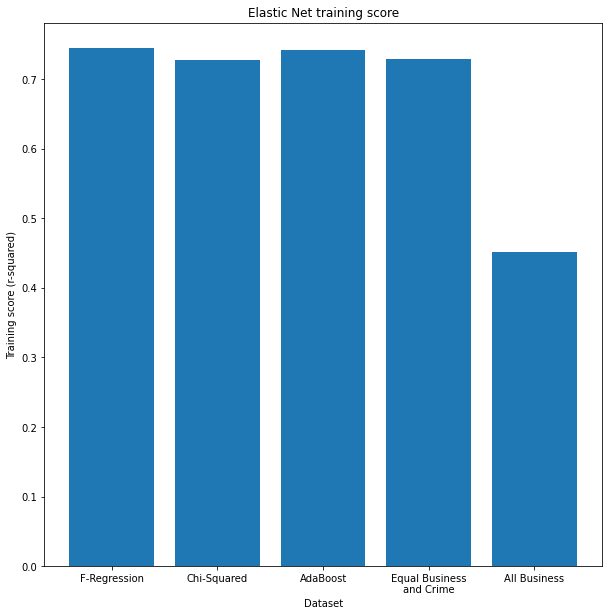

In [33]:
plt.figure(figsize = (10,10))
plt.xticks(y_select,datasets)
plt.title(display_name + " training score")
plt.xlabel("Dataset")
plt.ylabel("Training score (r-squared)")
plt.bar(y_select, training_scores)

<BarContainer object of 5 artists>

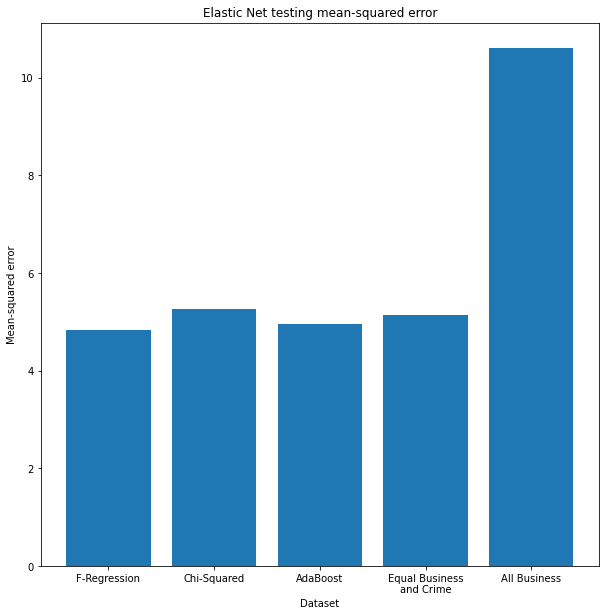

In [34]:
plt.figure(figsize = (10,10))
plt.xticks(y_select,datasets)
plt.title(display_name + " testing mean-squared error")
plt.xlabel("Dataset")
plt.ylabel("Mean-squared error")
plt.bar(y_select, mse_scores)

<BarContainer object of 5 artists>

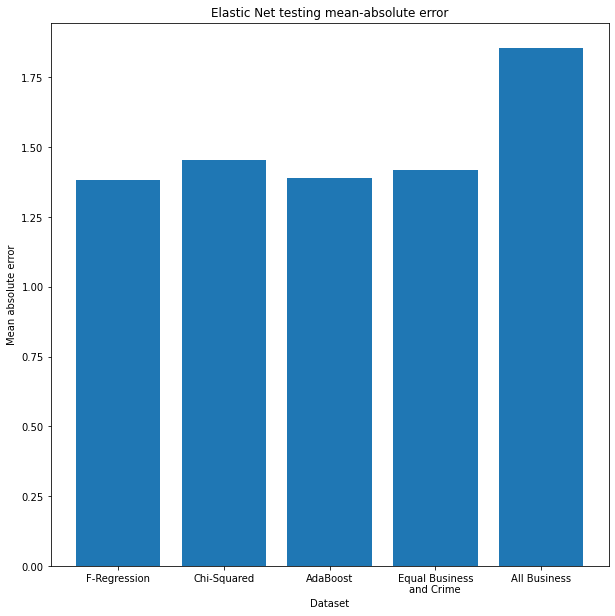

In [35]:
plt.figure(figsize = (10,10))
plt.xticks(y_select,datasets)
plt.title(display_name + " testing mean-absolute error")
plt.xlabel("Dataset")
plt.ylabel("Mean absolute error")
plt.bar(y_select, mae_scores)

<BarContainer object of 5 artists>

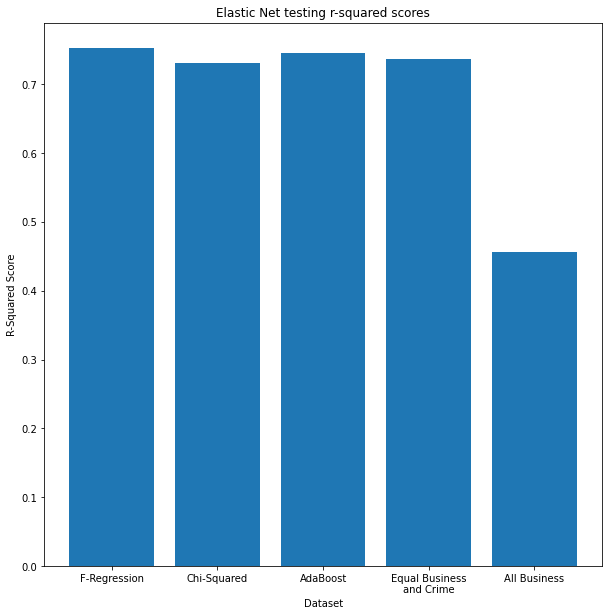

In [36]:
plt.figure(figsize = (10,10))
plt.xticks(y_select,datasets)
plt.title(display_name + " testing r-squared scores")
plt.xlabel("Dataset")
plt.ylabel("R-Squared Score")
plt.bar(y_select, r2_scores)